In [453]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random as random

1. **Initialize**: Determine the number of clusters (K) you want to partition your data into. Randomly initialize K cluster centroids. These centroids can be randomly selected data points or placed at random locations within the feature space.

2. **Assign Data Points to Clusters**: For each data point, calculate the distance to each centroid using a distance metric such as Euclidean distance. Assign each data point to the cluster whose centroid is closest to it.

3. **Update Centroids**: After all data points have been assigned to clusters, calculate the mean of the data points in each cluster. This will be the new centroid for that cluster.

4. **Repeat**: Repeat steps 2 and 3 until convergence criteria are met. Convergence can be defined by several conditions, such as no (or minimal) change in cluster assignments or centroids, a maximum number of iterations reached, or a predefined threshold for centroid movement.

5. **Convergence Criteria**: Decide on a stopping criterion to end the iterative process. Common criteria include a maximum number of iterations, a minimum change in centroid positions, or when the cluster assignments no longer change.

6. **Finalize Clusters**: Once the algorithm converges, the clusters are finalized. Each data point is assigned to one of the K clusters.

7. **Evaluation (Optional)**: If ground truth labels are available, you can evaluate the quality of the clustering using metrics such as the Silhouette Score or the Davies–Bouldin Index. These metrics measure the compactness and separation of the clusters.

8. **Parameter Tuning (Optional)**: Experiment with different initializations, distance metrics, and numbers of clusters to find the optimal clustering solution for your data.

By following these steps, you can implement a basic K-means clustering algorithm from scratch. Remember that K-means is sensitive to initialization, and different initializations may lead to different final cluster assignments. Therefore, it's often a good practice to run the algorithm multiple times with different initializations and choose the solution with the lowest objective function value or the best clustering quality metric.


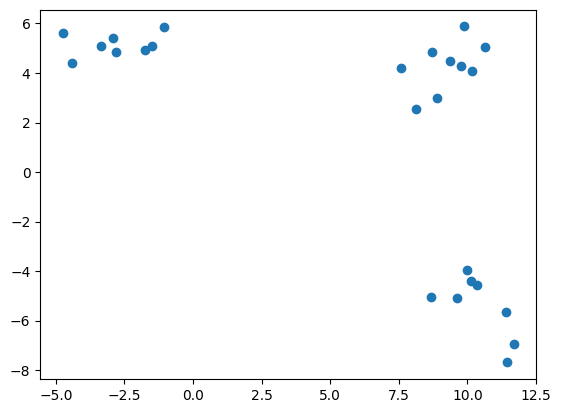

In [454]:
n_samples = 25
n_centroids = 3
X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = n_centroids,random_state = 24)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [455]:
print(X)

[[-1.51476956  5.08685459]
 [ 8.88406571  2.99943061]
 [ 9.61166234 -5.078836  ]
 [-2.80072625  4.84366052]
 [-3.36541099  5.08753989]
 [ 8.71918075  4.84046953]
 [ 9.76476292  4.28596289]
 [-1.74832259  4.91491774]
 [-4.74916142  5.60072569]
 [-4.40762578  4.40445921]
 [ 8.12952981  2.55152772]
 [-2.90869286  5.42834275]
 [ 9.87915087  5.87951373]
 [10.65377073  5.04797843]
 [10.11901421 -4.39105147]
 [10.35183864 -4.56112637]
 [-1.07790022  5.85814956]
 [ 8.66041017 -5.03579287]
 [ 7.57394183  4.2098062 ]
 [11.68392874 -6.92461715]
 [ 9.99530564 -3.97085826]
 [11.42632955 -7.68800828]
 [11.39020068 -5.66198199]
 [10.16188447  4.09425219]
 [ 9.36590767  4.50525938]]


In [456]:
random_centroids = np.random.sample(1)
random_centroids

array([0.96420112])

In [457]:
random_centroids = np.random.choice(n_samples, size=3)
print(np.shape(random_centroids))
print(random_centroids)

(3,)
[23  7  0]


In [458]:
random_centroids = np.random.randint(0,n_samples,n_centroids)
random_centroids

array([ 8, 22,  7])

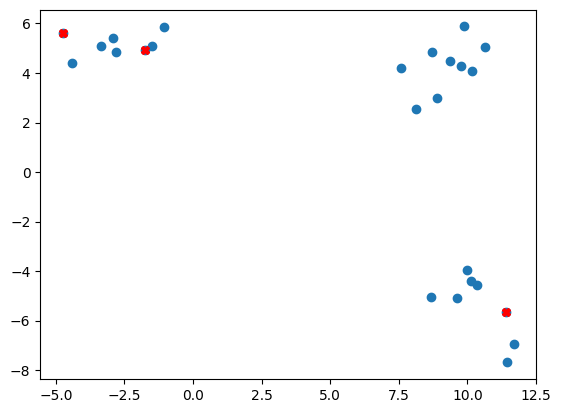

In [459]:
plt.scatter(X[:,0],X[:,1])
for i in range(len(random_centroids)):
  index = random_centroids[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')
plt.show()

In [460]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2))

In [ ]:
def assign_to_centroid(random_centroids):
  collection_points_per_cluster = [[] for _ in range(n_centroids)]
  assign_centroid = np.zeros(n_samples)
  # print(assign_centroid)
  j_hist = np.zeros(shape=(n_samples,n_centroids))
  # Assign to centroid
  for i in range(n_samples):
    data = np.array((X[i,0], X[i,1]))
    # print("DATA", data)
    for j in range(n_centroids):
      j_centroid = random_centroids[j]
      point = np.array((X[j_centroid,0], X[j_centroid,1]))
      dist = euclidean(data,point)
      j_hist[i,j] = dist
    assign_centroid[i] = j_hist[i].argmin()
    collection_points_per_cluster[j_hist[i].argmin()].append(data)

  return assign_centroid,j_hist, collection_points_per_cluster


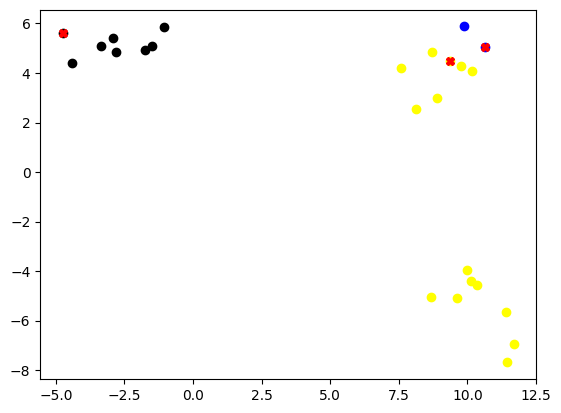

In [ ]:
assign_centroid,j_hist,collection_points_per_cluster = assign_to_centroid(random_centroids)

collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)

for i in range(len(random_centroids)):
  index = random_centroids[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')

for i in range(n_samples):
  x = X[i,0]
  y = X[i,1]
  if(assign_centroid[i] == 0):
    plt.scatter(x,y, color='black', label='0')
  elif(assign_centroid[i] == 1):
    plt.scatter(x,y, color='yellow', label='1')
  elif(assign_centroid[i] == 2):
    plt.scatter(x,y, color='blue', label='2')

plt.show()

In [ ]:
collection_points_per_cluster

array([array([[-1.51476956,  5.08685459],
              [-2.80072625,  4.84366052],
              [-3.36541099,  5.08753989],
              [-1.74832259,  4.91491774],
              [-4.74916142,  5.60072569],
              [-4.40762578,  4.40445921],
              [-2.90869286,  5.42834275],
              [-1.07790022,  5.85814956]]),
       array([[ 8.88406571,  2.99943061],
              [ 9.61166234, -5.078836  ],
              [ 8.71918075,  4.84046953],
              [ 9.76476292,  4.28596289],
              [ 8.12952981,  2.55152772],
              [10.11901421, -4.39105147],
              [10.35183864, -4.56112637],
              [ 8.66041017, -5.03579287],
              [ 7.57394183,  4.2098062 ],
              [11.68392874, -6.92461715],
              [ 9.99530564, -3.97085826],
              [11.42632955, -7.68800828],
              [11.39020068, -5.66198199],
              [10.16188447,  4.09425219],
              [ 9.36590767,  4.50525938]]),
       array([[ 9.87915087,  5

In [ ]:
def find_cluster_mean():
  cluster_means = np.zeros(shape=(n_centroids, 2))

  for i in range(n_centroids):
    x_sum = 0
    y_sum = 0
    n = 0
    points = collection_points_per_cluster[i]
    for j in range(len(points)):
      x_y = collection_points_per_cluster[i][j]
      x_sum += x_y[0]
      y_sum += x_y[1]
      n += 1
    x_mean = x_sum / n
    y_mean = y_sum / n
    cluster_means[i,0] = x_mean
    cluster_means[i,1] = y_mean
  return cluster_means

In [ ]:
cluster_mean = find_cluster_mean()
cluster_mean

array([[-2.82157621,  5.15308124],
       [ 9.72253087, -1.05503759],
       [10.2664608 ,  5.46374608]])

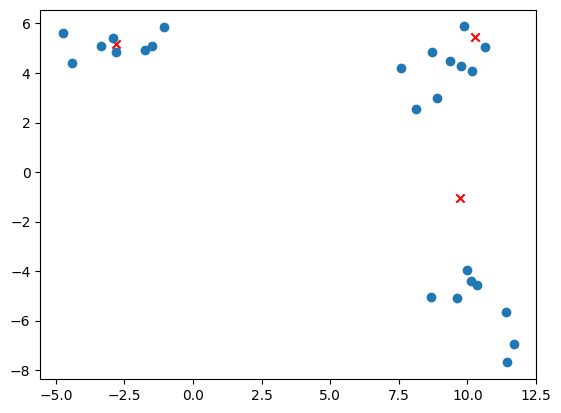

In [ ]:
plt.scatter(cluster_mean[:,0], cluster_mean[:,1], marker='x', color='red')
plt.scatter(X[:,0], X[:,1])

In [ ]:
def find_closets_centroid():
  euclidean_hist = np.zeros(shape=(3,n_samples))
  new_centroids = np.zeros(shape=(n_centroids,2))
  new_centroid_index = np.zeros(3)
  for i in range(len(cluster_mean)):
    point = cluster_mean[i]
    for j in range(n_samples):
      data = np.array((X[j,0],X[j,1]))
      euclidean_hist[i,j] = euclidean(data,point)
    new_index = euclidean_hist[i].argmin()
    new_centroid_index[i] = new_index
    new_centroid_index = new_centroid_index.astype(int)
    print(new_index)
    new_centroids[i] = np.array((X[new_index,0], X[new_index,1]))

  print(new_centroid_index)

  # new_centroids = np.zeros(shape=(n_centroids,2)
  print(euclidean_hist)
  return new_centroids,new_centroid_index

11
24
15
[11 24 15]
[[ 1.3084837  11.90211173 16.10209773  0.31012241  0.54776997 11.54499013
  12.61617322  1.09936126  1.97888107  1.75384954 11.25587863  0.28871822
  12.72148467 13.47575681 16.07946982 16.36779424  1.88083154 15.3508686
  10.43822605 18.8753933  15.73272806 19.18062561 17.8588968  13.02656401
  12.20468912]
 [10.78279867  1.31696173  9.35458996 12.05138178 12.62892523  0.77167713
   0.52814968 11.00425067 14.04940264 13.64521621  2.04289222 12.20088151
   1.73454926  1.6172439   8.70410902  8.89948622 10.43662391  9.32188095
   1.66399517 11.457227    8.27393363 12.15506219 10.16100669  0.94119611
   0.26984497]
 [15.88539155  8.54980296  0.86109382 16.72145863 17.31770088 10.39212577
   9.72109224 15.94949888 18.73415537 17.77109567  8.28415316 17.16995026
  11.30577581 10.46497365  1.06216176  0.85455266 16.09084709  1.78496183
  10.0315634   1.97937842  1.50015722  2.49287131  1.01608132  9.51138964
   9.97355276]]


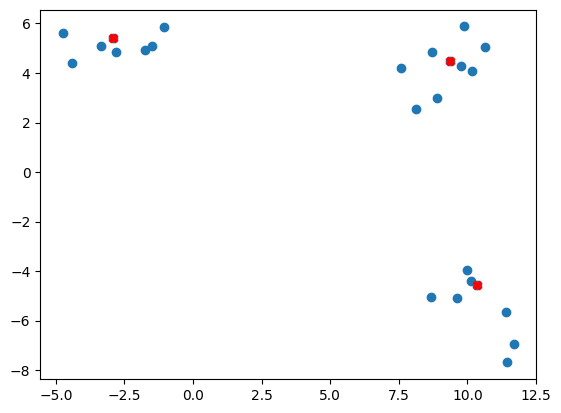

In [ ]:
new_centroids, new_centroid_index = find_closets_centroid()

plt.scatter(X[:,0], X[:,1])
plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='X', color='red')
plt.show()

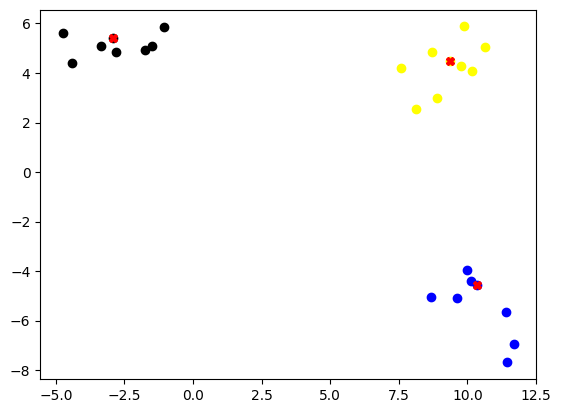

In [ ]:
assign_centroid,j_hist, collection_points_per_cluster = assign_to_centroid(new_centroid_index)
# collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)

for i in range(len(random_centroids)):
  index = new_centroid_index[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')

for i in range(n_samples):
  x = X[i,0]
  y = X[i,1]
  if(assign_centroid[i] == 0):
    plt.scatter(x,y, color='black', label='0')
  elif(assign_centroid[i] == 1):
    plt.scatter(x,y, color='yellow', label='1')
  elif(assign_centroid[i] == 2):
    plt.scatter(x,y, color='blue', label='2')

plt.show()

In [ ]:
class KMeans:
    def __init__(self, data, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.data = data
        self.n_samples = len(data)

    # Initialize the centroids by picking random index's in X
    def _initialize_centroids(self):
      random_centroids = np.random.randint(0,self.n_samples,self.n_clusters)
      return random_centroids

    def euclidean(point, data):
      return np.sqrt(np.sum((point - data)**2))

    def assign_to_centroid(self, random_centroids):
      collection_points_per_cluster = [[] for _ in range(self.n_clusters)]
      assign_centroid = np.zeros(n_samples)

      j_hist = np.zeros(shape=(self.n_samples,self.n_clusters))

      for i in range(self.n_samples):
        data = np.array((X[i,0], X[i,1]))
        for j in range(self.n_clusters):
          j_centroid = random_centroids[j]
          point = np.array((X[j_centroid,0], X[j_centroid,1]))
          dist = euclidean(data,point)
          j_hist[i,j] = dist
        assign_centroid[i] = j_hist[i].argmin()
        collection_points_per_cluster[j_hist[i].argmin()].append(data)
      return assign_centroid,j_hist, collection_points_per_cluster

    def find_cluster_mean(self):
      cluster_means = np.zeros(shape=(n_centroids, 2))

      for i in range(n_centroids):
        x_sum = 0
        y_sum = 0
        n = 0
        points = collection_points_per_cluster[i]
        for j in range(len(points)):
          x_y = collection_points_per_cluster[i][j]
          x_sum += x_y[0]
          y_sum += x_y[1]
          n += 1
        x_mean = x_sum / n
        y_mean = y_sum / n
        cluster_means[i,0] = x_mean
        cluster_means[i,1] = y_mean
      return cluster_means

    def fit(self, X):
        pass

    def predict(self, X):
        pass

    def _assign_clusters(self, X, centroids):
        pass

    def _update_centroids(self, X, clusters):
        pass

    # Calculate Euclidean Distance
    def _calculate_distance(self, centroid, data):
      pass



In [475]:
def plot(assign_centroid,j_hist, collection_points_per_cluster):
  collection_points_per_cluster = np.array([np.array(sublist) for sublist in collection_points_per_cluster], dtype=object)

  for i in range(len(random_centroids)):
    index = new_centroid_index[i]
    plt.plot(X[index,0], X[index,1], marker='X',color='red')

  for i in range(n_samples):
    x = X[i,0]
    y = X[i,1]
    if(assign_centroid[i] == 0):
      plt.scatter(x,y, color='black', label='0')
    elif(assign_centroid[i] == 1):
      plt.scatter(x,y, color='yellow', label='1')
    elif(assign_centroid[i] == 2):
      plt.scatter(x,y, color='blue', label='2')

  plt.show()

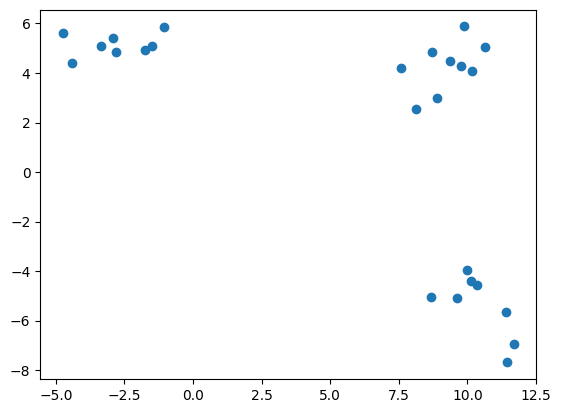

In [489]:
n_samples = 25
n_clusters = 3
X,y = make_blobs(n_samples = n_samples,n_features = 2,centers = n_clusters,random_state = 24)
plt.scatter(X[:,0],X[:,1])
plt.show()

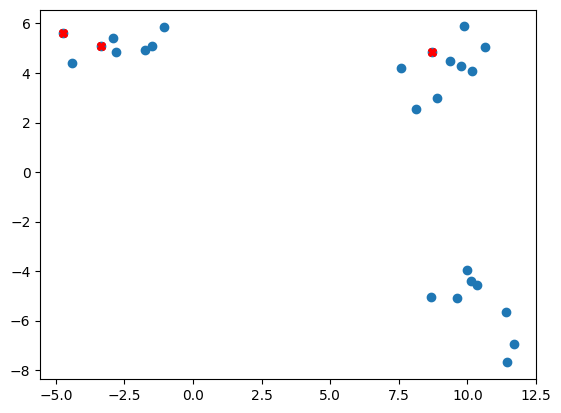

In [487]:
kMeans = KMeans(data=X, n_clusters=n_clusters, max_iter=300)
initial_centroids = kMeans._initialize_centroids()

plt.scatter(X[:,0],X[:,1])
for i in range(len(initial_centroids)):
  index = initial_centroids[i]
  plt.plot(X[index,0], X[index,1], marker='X',color='red')
plt.show()

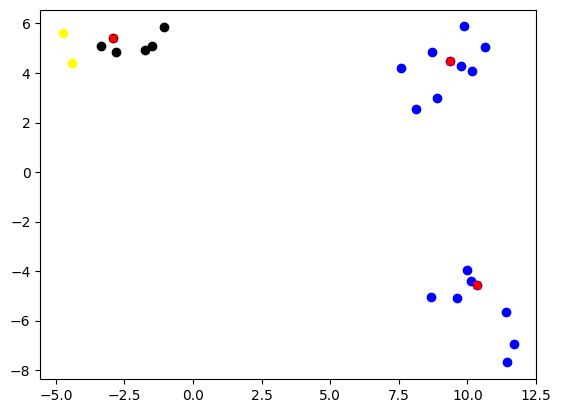

In [488]:

assign_centroid,j_hist,collection_points_per_cluster  = kMeans.assign_to_centroid(initial_centroids)
plot(assign_centroid,j_hist,collection_points_per_cluster)


In [474]:
cluster_mean = kMeans.find_cluster_mean()

